In [61]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

Question 1.1

In [62]:
# reading in the data
df = pd.read_csv('logbook_assignment1.csv')
df.head()

# 1. Identify what percentage of date fueled entries that are not proper dates.
df['date_fueled'] = pd.to_datetime(df['date_fueled'], errors='coerce')
invalid_dates = df['date_fueled'].isnull().sum()
print(f'Percentage of date fueled entries that are not proper dates: {invalid_dates / len(df) * 100:.2f}%')

df.head()


C:\Users\momos\AppData\Local\Temp\ipykernel_20244\2273693357.py:2: DtypeWarning: Columns (3,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('logbook_assignment1.csv')
C:\Users\momos\AppData\Local\Temp\ipykernel_20244\2273693357.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date_fueled'] = pd.to_datetime(df['date_fueled'], errors='coerce')
C:\Users\momos\AppData\Roaming\Python\Python311\site-packages\dateutil\parser\_parser.py:1207: UnknownTimezoneWarning: tzname H identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


Percentage of date fueled entries that are not proper dates: 11.66%


,date_fueled,date_captured,odometer,gallons,cost_per_gallon,total_spent,mpg,miles,user_url
0,NaT,Apr 7 2022,"73,370",NaN,NaN,NaN,NaN,NaN,https://www.somewebsite.com/suzuki/swift/2015/...
1,2012-11-07,Aug 30 2016,"11,983",12.120,$5.599,$67.86,31.6,NaN,https://www.somewebsite.com/bmw/x3/2009/461150
2,2012-09-22,Sep 28 2012,"98,233",7.991,£5.45,£43.53,28.5,NaN,https://www.somewebsite.com/mercedes-benz/e300...
3,2019-05-04,May 4 2019,"163,802",10.575,£5.11,£54.00,46.8,NaN,https://www.somewebsite.com/bmw/320d/2010/247233
4,2022-02-15,Feb 15 2022,NaN,11.651,$3.029,$35.29,21.0,244.4,https://www.somewebsite.com/honda/passport/201...


In [63]:
# 2. If date fueled is not entered correctly (or is not a date), and the date captured is a valid date, then fill in this value as a proxy.
# Fidn the values in the dataset where date_fueled is null and set it to the value of date_captured
df['date_fueled'] = df['date_fueled'].fillna(df['date_captured'])
df.head()

# Note: Percentage of date fueled entries that are not proper dates: 0.00%

,date_fueled,date_captured,odometer,gallons,cost_per_gallon,total_spent,mpg,miles,user_url
0,2022-04-07,Apr 7 2022,"73,370",NaN,NaN,NaN,NaN,NaN,https://www.somewebsite.com/suzuki/swift/2015/...
1,2012-11-07,Aug 30 2016,"11,983",12.120,$5.599,$67.86,31.6,NaN,https://www.somewebsite.com/bmw/x3/2009/461150
2,2012-09-22,Sep 28 2012,"98,233",7.991,£5.45,£43.53,28.5,NaN,https://www.somewebsite.com/mercedes-benz/e300...
3,2019-05-04,May 4 2019,"163,802",10.575,£5.11,£54.00,46.8,NaN,https://www.somewebsite.com/bmw/320d/2010/247233
4,2022-02-15,Feb 15 2022,NaN,11.651,$3.029,$35.29,21.0,244.4,https://www.somewebsite.com/honda/passport/201...


In [64]:
# 3. Convert the column to a date format, setting any invalid date fueled entries to NaT.
# Done this already previuosly

In [65]:
#4. Remove dates that are in the future, or dates that are earlier than 2005.
df = df[(df['date_fueled'] <= datetime.now()) & (df['date_fueled'].dt.year >= 2005)]



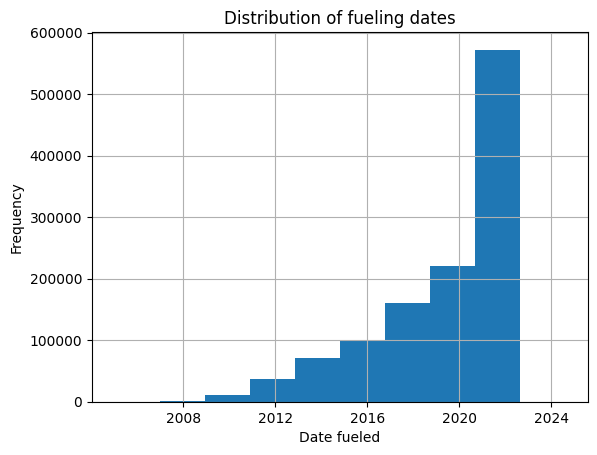

In [66]:
#5 Plot the distribution of fueling dates and comment on the results. 

df['date_fueled'].hist()
plt.xlabel('Date fueled')
plt.ylabel('Frequency')
plt.title('Distribution of fueling dates')
plt.show()

# Majority of the data is between 2021 and 2023
# Maybe people started using their services recently?
# Maybe cars more available? or just uber?
# Maybe fuel price increase, filled up less at a time, leading to more frequent fueling?


Question 1.2

In [67]:
# 1. Identify what percentage of gallons, miles, and odometer entries are missing.
df.head()
missing_gallons = df['gallons'].isnull().sum()
missing_miles = df['miles'].isnull().sum()
missing_odometer = df['odometer'].isnull().sum()
missing_mpg = df['mpg'].isnull().sum()

print(f'Percentage of missing gallons entries: {missing_gallons / len(df) * 100:.2f}%')
print(f'Percentage of missing miles entries: {missing_miles / len(df) * 100:.2f}%')
print(f'Percentage of missing odometer entries: {missing_odometer / len(df) * 100:.2f}%')
print(f'Percentage of missing mpg entries: {missing_mpg / len(df) * 100:.2f}%')

Percentage of missing gallons entries: 6.32%
Percentage of missing miles entries: 87.56%
Percentage of missing odometer entries: 12.68%
Percentage of missing mpg entries: 6.32%


In [68]:
df.head()

,date_fueled,date_captured,odometer,gallons,cost_per_gallon,total_spent,mpg,miles,user_url
0,2022-04-07,Apr 7 2022,"73,370",NaN,NaN,NaN,NaN,NaN,https://www.somewebsite.com/suzuki/swift/2015/...
1,2012-11-07,Aug 30 2016,"11,983",12.120,$5.599,$67.86,31.6,NaN,https://www.somewebsite.com/bmw/x3/2009/461150
2,2012-09-22,Sep 28 2012,"98,233",7.991,£5.45,£43.53,28.5,NaN,https://www.somewebsite.com/mercedes-benz/e300...
3,2019-05-04,May 4 2019,"163,802",10.575,£5.11,£54.00,46.8,NaN,https://www.somewebsite.com/bmw/320d/2010/247233
4,2022-02-15,Feb 15 2022,NaN,11.651,$3.029,$35.29,21.0,244.4,https://www.somewebsite.com/honda/passport/201...


In [69]:
#They may have used a , for thousands delimiter
df['miles'] = df['miles'].replace(',', '')
df['gallons'] = df['gallons'].replace(',', '')
df['mpg'] = df['mpg'].replace(',', '')

# This is being read in as strings, so we need to convert them to floats
df['miles'] = pd.to_numeric(df['miles'], errors='coerce')
df['gallons'] = pd.to_numeric(df['gallons'], errors='coerce')
df['mpg'] = pd.to_numeric(df['mpg'], errors='coerce')

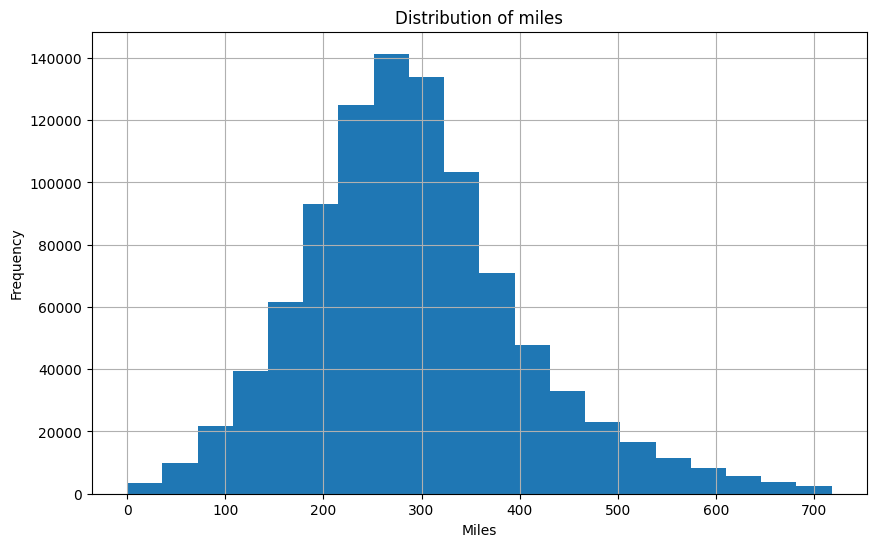

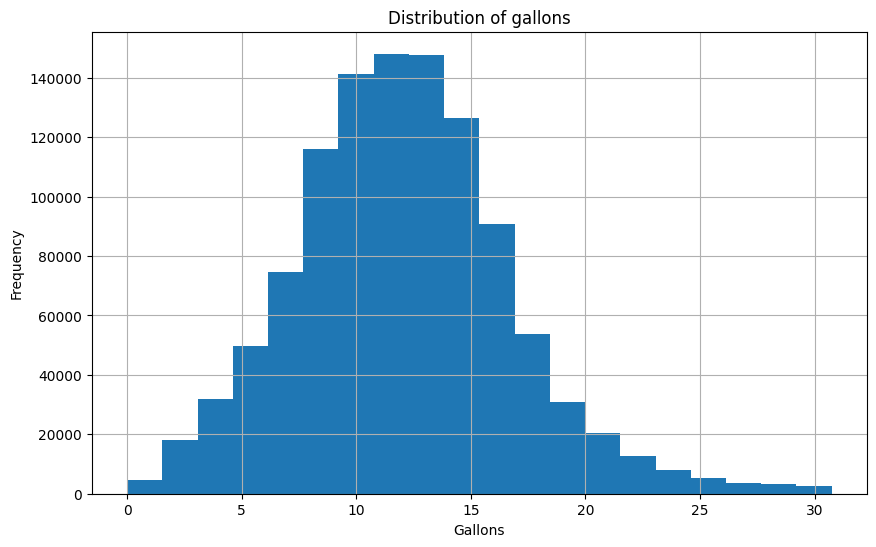

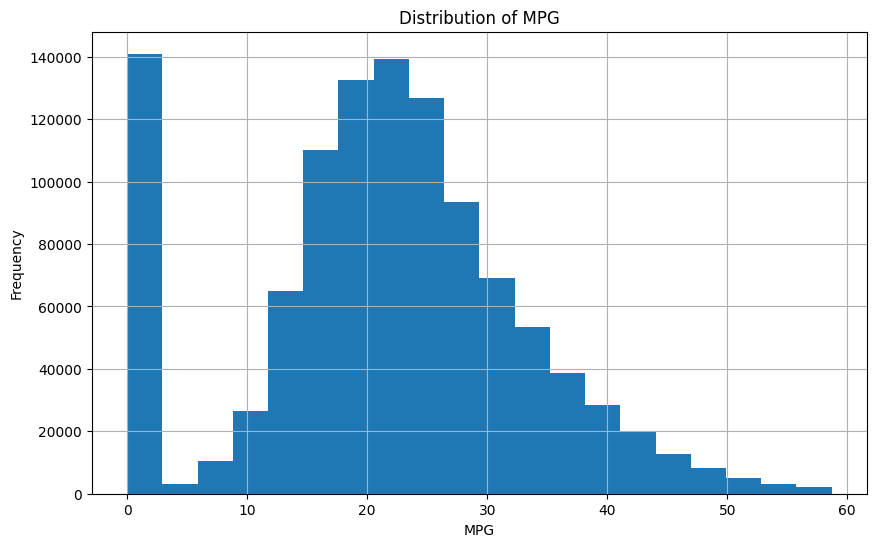

Number of values == 0 for gallons: 572
Number of values == 0 for miles: 13
Number of values == 0 for mpg: 139046


In [83]:
# Miles histogram
plt.figure(figsize=(10, 6))
df['miles'].hist(bins=20, range=(0, df['miles'].quantile(0.99)))
plt.xlabel('Miles')
plt.ylabel('Frequency')
plt.title('Distribution of miles')
plt.show()

# Gallons histogram
plt.figure(figsize=(10, 6))
df['gallons'].hist(bins=20, range=(0, df['gallons'].quantile(0.99)))
plt.xlabel('Gallons')
plt.ylabel('Frequency')
plt.title('Distribution of gallons')
plt.show()

# MPG histogram
plt.figure(figsize=(10, 6))
df['mpg'].hist(bins=20, range=(0, df['mpg'].quantile(0.99)))
plt.xlabel('MPG')
plt.ylabel('Frequency')
plt.title('Distribution of MPG')
plt.show()

count = df[df['gallons'] == 0].shape[0]
print(f'Number of values == 0 for gallons: {count}')
count = df[df['miles'] == 0].shape[0]
print(f'Number of values == 0 for miles: {count}')
count = df[df['mpg'] == 0].shape[0]
print(f'Number of values == 0 for mpg: {count}')

In [87]:
# 2. The miles, gallons and mpg columns are interdependent. If one is missing, the other two can be used to calculate it
# 3. The values will be read in as objects (or strings) by Pandas. Convert these values to float (note the point above about commas in the value).

#They may have used a , for thousands delimiter
df['miles'] = df['miles'].replace(',', '')
df['gallons'] = df['gallons'].replace(',', '')
df['mpg'] = df['mpg'].replace(',', '')

# This is being read in as strings, so we need to convert them to floats
df['miles'] = pd.to_numeric(df['miles'], errors='coerce')
df['gallons'] = pd.to_numeric(df['gallons'], errors='coerce')
df['mpg'] = pd.to_numeric(df['mpg'], errors='coerce')

# mpg = miles / gallons
# miles = mpg * gallons
# gallons = miles / mpg

# Fill in missing values for mpg if miles and gallons 
# df['mpg'] = df['mpg'].fillna(df['miles'] / df['gallons'])
# df['miles'] = df['miles'].fillna(df['mpg'] * df['gallons'])
# df['gallons'] = df['gallons'].fillna(df['miles'] / df['mpg'])
# Iterate over the DataFrame row by row
for index, row in df.iterrows():
    if pd.isnull(row['mpg']) and not pd.isnull(row['miles']) and not pd.isnull(row['gallons']):
        # Calculate mpg if miles and gallons are available and gallons > 0
        if row['gallons'] > 0:
            df.at[index, 'mpg'] = row['miles'] / row['gallons']
        
    elif pd.isnull(row['miles']) and not pd.isnull(row['mpg']) and not pd.isnull(row['gallons']):
        # Calculate miles if mpg and gallons are available and mpg > 0
        if row['mpg'] > 0:
            df.at[index, 'miles'] = row['mpg'] * row['gallons']
        
    elif pd.isnull(row['gallons']) and not pd.isnull(row['miles']) and not pd.isnull(row['mpg']):
        # Calculate gallons if miles and mpg are available and mpg > 0
        if row['mpg'] > 0:
            df.at[index, 'gallons'] = row['miles'] / row['mpg']
            
for index, row in df.iterrows():
    if pd.isnull(row['mpg']) and not pd.isnull(row['miles']) and not pd.isnull(row['gallons']):
        # Calculate mpg if miles and gallons are available and gallons > 0
        if row['gallons'] > 0:
            df.at[index, 'mpg'] = row['miles'] / row['gallons']
        
    elif pd.isnull(row['miles']) and not pd.isnull(row['mpg']) and not pd.isnull(row['gallons']):
        # Calculate miles if mpg and gallons are available and mpg > 0
        if row['mpg'] > 0:
            df.at[index, 'miles'] = row['mpg'] * row['gallons']
        
    elif pd.isnull(row['gallons']) and not pd.isnull(row['miles']) and not pd.isnull(row['mpg']):
        # Calculate gallons if miles and mpg are available and mpg > 0
        if row['mpg'] > 0:
            df.at[index, 'gallons'] = row['miles'] / row['mpg']


missing_gallons = df['gallons'].isnull().sum()
missing_miles = df['miles'].isnull().sum()
missing_odometer = df['odometer'].isnull().sum()
missing_mpg = df['mpg'].isnull().sum()

print(f'Percentage of missing gallons entries: {missing_gallons / len(df) * 100:.2f}%')
print(f'Percentage of missing miles entries: {missing_miles / len(df) * 100:.2f}%')
print(f'Percentage of missing odometer entries: {missing_odometer / len(df) * 100:.2f}%')
print(f'Percentage of missing mpg entries: {missing_mpg / len(df) * 100:.2f}%')

Percentage of missing gallons entries: 6.32%
Percentage of missing miles entries: 17.80%
Percentage of missing odometer entries: 12.68%
Percentage of missing mpg entries: 6.32%


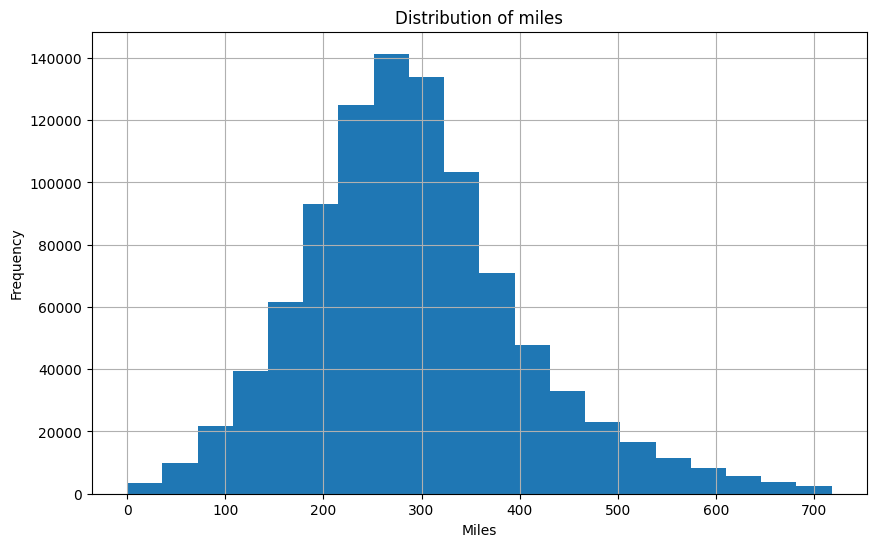

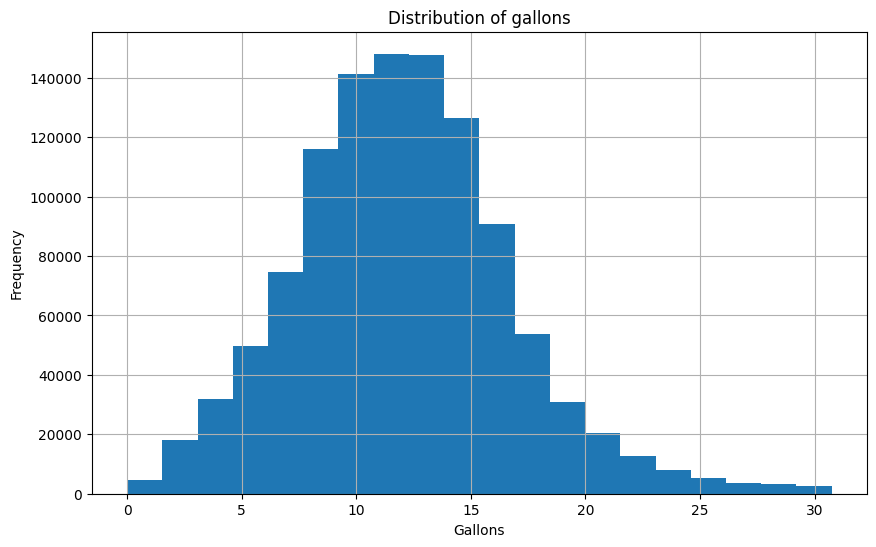

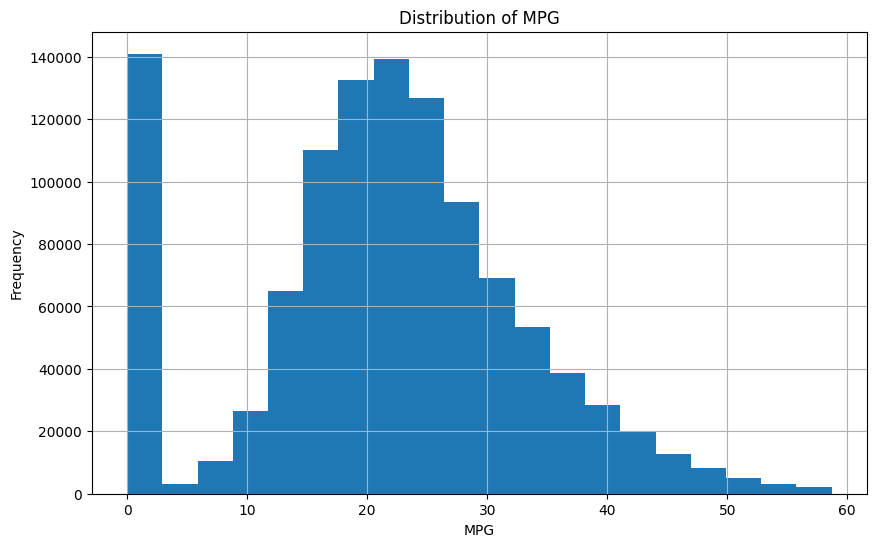

In [88]:
# 4. Plot the distributions and comment on the distributions adjust the range of the x-axis to better visualize the data.

# Miles histogram
plt.figure(figsize=(10, 6))
df['miles'].hist(bins=20, range=(0, df['miles'].quantile(0.99)))
plt.xlabel('Miles')
plt.ylabel('Frequency')
plt.title('Distribution of miles')
plt.show()

# Gallons histogram
plt.figure(figsize=(10, 6))
df['gallons'].hist(bins=20, range=(0, df['gallons'].quantile(0.99)))
plt.xlabel('Gallons')
plt.ylabel('Frequency')
plt.title('Distribution of gallons')
plt.show()

# MPG histogram
plt.figure(figsize=(10, 6))
df['mpg'].hist(bins=20, range=(0, df['mpg'].quantile(0.99)))
plt.xlabel('MPG')
plt.ylabel('Frequency')
plt.title('Distribution of MPG')
plt.show()



In [73]:
# Compute the statistical description of the columns: mean, standard deviation, max, min, most frequent, and quartiles.
df.describe()

# Print the most frequent values for each column
print('Most frequent values:')
print(df.mode().iloc[0])



Most frequent values:
date_fueled                                      2022-04-09 00:00:00
date_captured                                            Aug 31 2016
odometer                                                          1 
gallons                                                       10.567
cost_per_gallon                                               $2.999
total_spent                                                    $0.00
mpg                                                              0.0
miles                                                          300.0
user_url           https://www.somewebsite.com/jeep/wrangler/2007...
Name: 0, dtype: object
